Matteo Picciolini

# Esercitazione 4

In [2]:
#matplotlib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#numpy
import numpy as np

#fit
from scipy.optimize import curve_fit

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

#variable
th_var = ["ekin", "epot", "etot", "press", "temp"]
labels = [  "Kinetic en.\n(progr. average)",
            "Potential en.\n(progr. average)",
            "Total en.\n(progr. average)",
            "Pressure\n(progr. average)", 
            "Temperature\n(block average)",
            "Temperature\n(progr. average)"]
titles = [  "Kinetic energy",
            "Potential energy",
            "Total energy",
            "Pressure", 
            "Temperature",
            "Temperature"]
ylabels = ["K*/N", "U*/N", "E*/N", "p*", "T*", "T*"]
colors = ["r", "g", "b", "k", "c"]

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, perform MD simulations via a Lennard-Jones modelof Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### Risoluzione

#### *Ensemble* microcanonico

In fisica statistica, l'*ensemble* è un concetto fondamentale che rappresenta un insieme di sistemi fisici che condividono le stesse proprietà macroscopiche, ovvero le proprietà termodinamiche che caratterizzano lo stato di equilibrio del sistema.

Ogni *ensemble* descrive uno stato termodinamico specifico del sistema, e consente di calcolare le proprietà termodinamiche del sistema a partire dalle proprietà microscopiche dei singoli atomi o molecole. In particolare, l'*ensemble* microcanonico descrive un insieme di sistemi fisici che condividono la stessa energia totale, il volume e il numero di particelle. L'*ensemble* microcanonico rappresenta quindi una descrizione di un sistema termodinamico isolato, in cui l'energia totale è costante e il numero di particelle e il volume sono fissi. In questo tipo di *ensemble*, ogni microstato del sistema fisico ha la stessa probabilità di essere osservato, poiché tutti i microstati sono equiprobabili e il sistema è isolato, ovvero non scambia energia, materia o lavoro con l'esterno.

Questa proprietà deriva dal fatto che, in un sistema all'equilibrio termodinamico, il sistema tende a distribuirsi in modo uniforme tra tutti i microstati possibili compatibili con le condizioni imposte dall'*ensemble* microcanonico. In altre parole, il sistema esplora tutte le possibili configurazioni microscopiche compatibili con le restrizioni imposte dall'*ensemble*, e la probabilità di trovare il sistema in una particolare configurazione è proporzionale al numero di microstati che corrispondono a quella configurazione.

La conoscenza esatta delle proprietà termodinamiche di un microstato richiede la conoscenza precisa della sua configurazione nello spazio delle fasi, il che non è possibile nella pratica. Tuttavia, a livello computazionale, è possibile stimare tali proprietà termodinamiche utilizzando le informazioni disponibili sulla dinamica del sistema. 

#### *Periodic Boundary Condition*

Le *Periodic Boundary Conditions* (PBC) sono una tecnica utilizzata nella simulazione al computer di sistemi fisici che prevedono una ripetizione periodica delle condizioni di bordo. In sostanza, le PBC permettono di simulare un sistema fisico in una scatola periodica, in cui le particelle sono considerate periodiche e si ripetono ciclicamente in tutte le direzioni.

La Dinamica Molecolare fa ampio uso delle PBC, infatti una simulazione di Dinamica Molecolare ha come obiettivo quello di descrivere il movimento delle particelle di un sistema, ma risolvere le equazioni del moto per sistemi termodinamici composti da un grande numero di particelle risulta computazionalmente dispendioso. L'utilizzo delle  PBC permette, invece, di considerare soltanto le particelle contenute in una cella elementare e quelle nella cella immediatamente adiacente.

#### Algoritmo di Verlet
L'algoritmo di Verlet è un metodo numerico utilizzato nella simulazione di Dinamica Molecolare per calcolare il movimento delle particelle di un sistema. Questo algoritmo è basato sulla definizione della posizione e della velocità delle particelle in due tempi successivi: utilizzando queste informazioni, l'algoritmo calcola l'accelerazione delle particelle e utilizza questa informazione per predire la posizione delle particelle in un tempo successivo. La velocità al tempo $t+\delta t$ è data, infatti, da:

$$
\vec r(t+\delta t) \approx 2\vec r(t) -\vec r(t-\delta t) + \delta t^2 \vec a(t),
$$

con $\vec a$ è l'accelerazione. L'algoritmo per funzionare correttamente ha bisogno di informazioni relative a due istanti distinti, per questo motivo, il programma, in fase di inizializzazione, a seconda del valore del parametro `restart` (per maggiori dettagli si veda il prossimo paragrafo), è in grado di partire da una configurazione specificata dall'utente oppure aggirare il problema generando stocasticamente le velocità secondo una distribuzione Gaussiana e, per le particelle, utilizzando una configurazione di cristallo.

L'algoritmo di Verlet presenta diverse proprietà che lo rendono una scelta popolare nella simulazione di sistemi fisici. In particolare:

 - L'algoritmo di Verlet è un metodo numerico di tipo *time-reversible*, il che significa che l'algoritmo può essere eseguito in avanti o all'indietro nel tempo, producendo sempre lo stesso risultato.

 - L'algoritmo di Verlet conserva l'energia del sistema, ovvero l'energia totale del sistema (che è la somma dell'energia cinetica e dell'energia potenziale) rimane costante durante la simulazione. Questo rende l'algoritmo di Verlet particolarmente utile nella simulazione di sistemi di conservazione dell'energia.

Alcuni svantaggi sono però:
 - L'algoritmo di Verlet potrebbe essere influenzato dalla presenza di particelle molto vicine tra loro, il che potrebbe causare una divergenza dell'accelerazione e portare ad una simulazione instabile.

 - L'algoritmo di Verlet potrebbe non essere adeguato per la simulazione di sistemi con potenziali di interazione complessi, come quelli che presentano legami chimici forti.

 - L'algoritmo di Verlet non tiene conto degli effetti di dissipazione di energia, come la frizione, che potrebbero essere importanti in alcune simulazioni.

#### Commenti sulla simulazione e sul codice
Per questa esercitazione è stato fornito un codice procedurale che permette di simulare l'evoluzione dinamica di un sistema di $N=108$ particelle utilizzando l'algorimo di Verlet. Questo codice permette di misurare l'energia totale per particella $\frac{E}{N}$, l'energia potenziale per particella $\frac{U}{N}$, l'energia cinetica per particella $\frac{K}{N}$ e la temperatura $T$ del sistema. Inoltre il codice consente di salvare le posizione delle particelle in alcuni file, in modo da poter visualizzare il movimento delle particelle utilizzando software specializzare come `Ovito`. 

Al contrario di tutte le simulazione fino ad ora utilizzate, i parametri vengono settati da file di input esterni, situati nella cartella `input-output`.
In particolare, dal file di input è possibile inizializzare le seguenti varibili:

- `restart`: booleano che permette di far partire la simulazione da una data configurazione salvata nel file `input-output/config.out`.
- `temp`: temperatura utlizzata per la fase di equilibrazione per inizializzare le velocità delle particelle a partire da una configurazione in cui le velocità delle particelle non sono conosciute.
- `npart`: numero di particele. Per questa esercitazione è fissato a 108.
- `rho`: densità. Dalla densità dipendono il volume `vol` e dimensioni `box` del sistema.
- `rcut`: raggio di *cutoff*. 
- `delta`: passo dell'algoritmo di Verlet.
- `nblk`: numero di blocchi.
- `nstep`: numero di step per blocco.

#### Svolgimento
Per svolgere gli esercizi è stato necessario modificare la formula della pressione fornita dalla consegna dell'esercizio in termini di grandezze ridotte, indicate con il simbolo $^\star$:
$$P^\star = \rho^\star T^\star + \frac{1}{3V^\star} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48 \left[\left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^{12}-\frac{1}{2}\left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right]\right\rangle
    = \rho^\star T^\star + \frac{\left\langle W \right\rangle}{3V^\star}, $$
dove si sono utilizzate le seguenti relazioni: 
$$ V= \epsilon V^\star ,\quad E= \epsilon E^\star,\quad K= \epsilon K^\star,\quad T = \frac{\epsilon}{k_B}T^\star,\quad P = \frac{\epsilon}{\sigma^3} P^\star.$$

Quindi, in termini di codice, ho modificato le seguenti righe, seguendo lo stile delle altre grandezza calcolate:
```c++
for (int i = 0; i < npart - 1; ++i){
    for (int j = i + 1; j < npart; ++j){
    [...]
    if(dr < rcut){
        [...]
        w_ij = 1./pow(dr, 12) - 0.5/pow(dr, 6.0);
        w += w_ij;
    }
}
[...]
walker[iw] = 48.0/(3.0 * vol) * w + rho * walker[it];
```
dove `walker[it]` è il parametro temperatura.

#### Equilibrazione
Come detto sopra, visto che l'algoritmo di Verlet per funzionare correttamente necessita di informazioni relative a due istanti differenti, se il parametro `restart` è impostato a $0$, il programma carica la configurazione cristallina salvata in `input-output/config.in` ed estrae le velocità secondo secondo una distribuzione di Gauss. Il programma è anche in grado di correggere  un possibile errore di *drift* causato da una distribuzione non perfettamente centrata in zero.

Monitorando, però, la temperatura durante le prime fasi della simulazione, si osserva che all'inizio, partendo da una configurazione cristallina perfetta, la temperatura non conserva il suo valore. Infatti, c'è bisogno di un certo tempo di rilassamento per permettere al sistema di stabilizzatsi e raggiungere la fase termodinamica desiderata. Per esempio, per la fase liquida, quando il sistema parte dalla configurazione fcc, ha un'energia potenziale bassa, ma dal momento che il sistema scioglierà per simulare la fase liquda, inevitabilmente l'energia potenziale aumenterà e, a causa del principio di conservazione dell'energia intrinseco all'algoritmo di Verlet, l'energia cinetica diminuità, e quindi anche la temperatura, che è collegata per solo una costante all'energia cinetica, diminuirà. In maniera analoga questo meccanismo è visibile anche per la fase gassosa e solida, e si verifica fintantochè il sistema non si è rilassato, ma a seconda della fase specifica il rilassamento richiede più o meno tempo.

In [3]:
#data acquisition
x_label, progressive_sum, progressive_error = np.loadtxt('../Data/04.1_epot.dat',
                                                         usecols = (0, 2, 3), unpack = 'true')
#x_label_samp, progressive_sum_samp, progressive_error_samp = np.loadtxt('../Data/04.1_epot.dat',
#                                                                        usecols = (0,1,2), unpack = 'true')

#style
plt.figure(figsize=(8,5))
plt.title("Integral value estation - Blocking average")
plt.xlabel('N of throws')
plt.ylabel('$<I>-1$')
plt.grid(True)

#plot
plt.errorbar(x_label,progressive_sum, 
             yerr = progressive_error, label = "Blocking average uniform sampling")
#plt.errorbar(x_label_samp, progressive_sum_samp - 1.0, 
#             yerr = progressive_error_samp, label = "Blocking average importance sampling")
#plt.axhline(0, ls = '-',c = 'red', label = "Exact value")

#legend
plt.legend()

plt.show()

FileNotFoundError: ../Data/04.1_epot.dat not found.

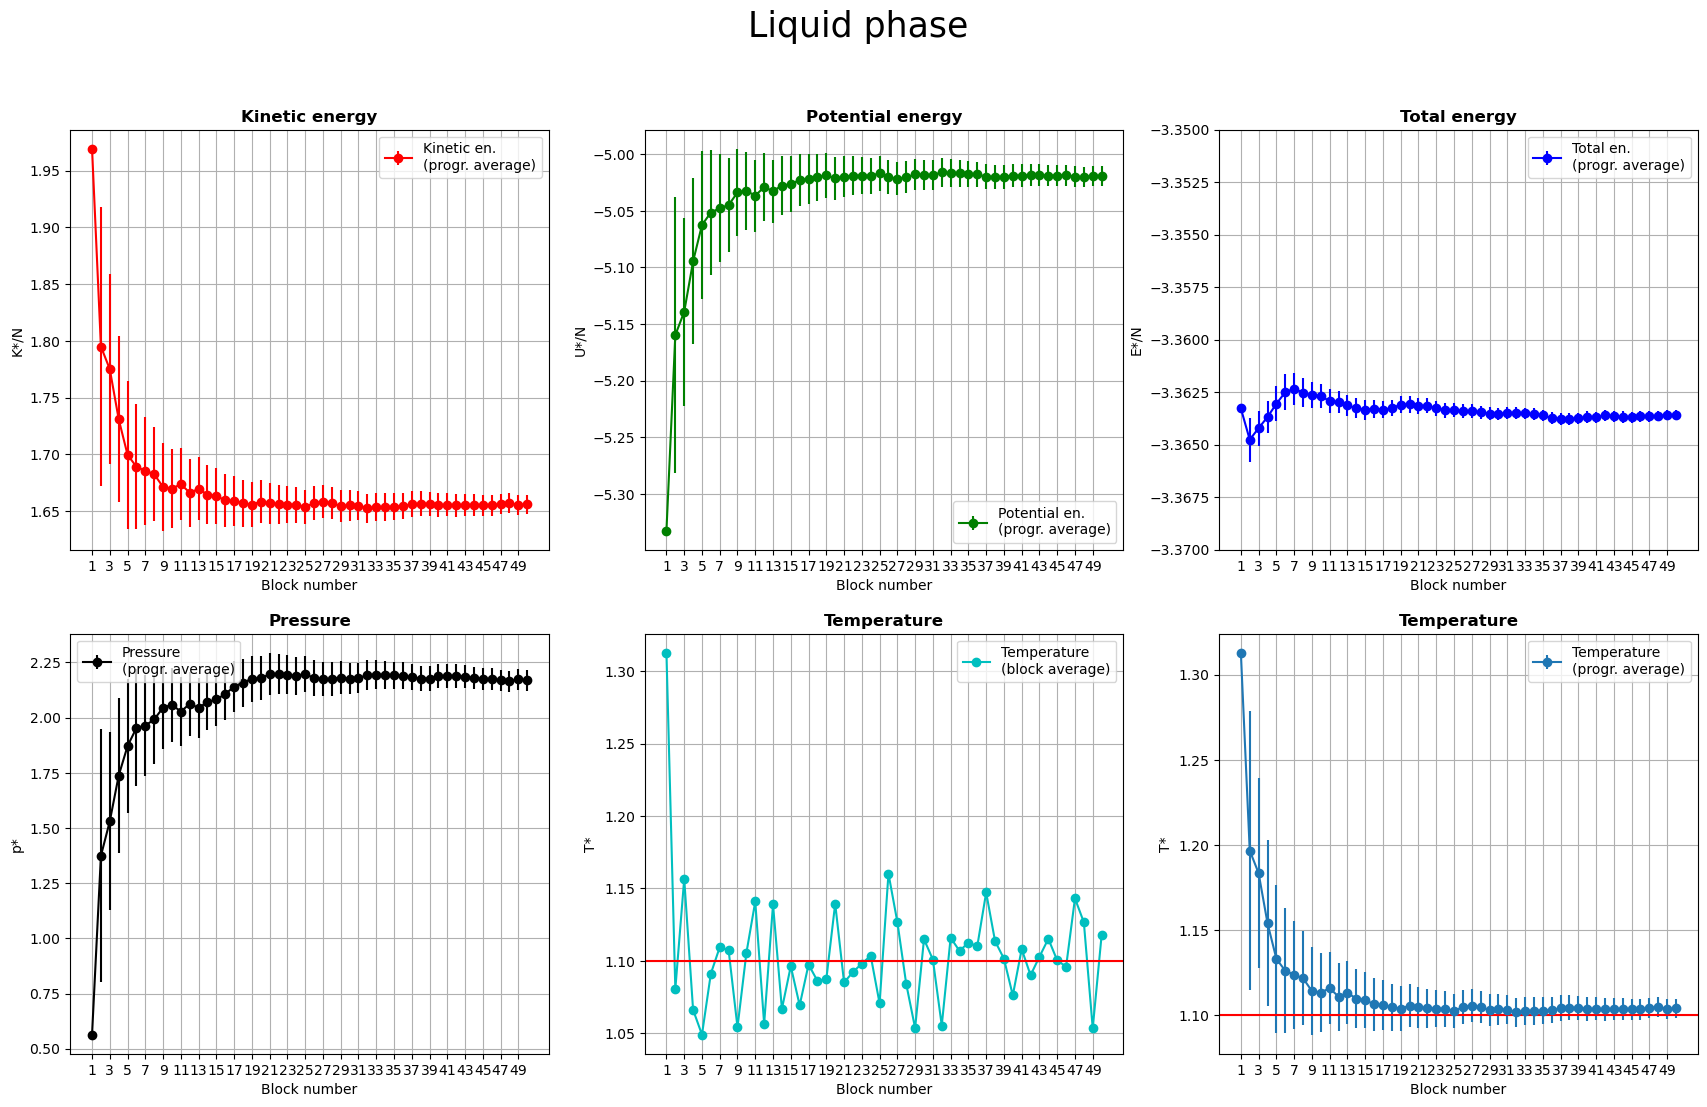

In [6]:
#liquid
N = 50
#x = np.arange(N)+1  
plt.figure(figsize=(21,12))
plt.suptitle("Liquid phase", fontsize = 25)

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    x, ave, ave_prog, err = np.loadtxt("../Data/04.1_eq_liquid_" + th_var[i] + ".dat", usecols=(0,1,2,3), unpack='true')

    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i], color = colors[i])
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(1,N+1,2))
    if(i==2):
        plt.ylim(-3.37, -3.35) # si nota che nella scala delle variazioni di K e U, l'energia totale resta fissata: Compatibile con NVE!
    if(i==4):
        plt.axhline(y=1.1, color ="r") # desired equilibrium T*
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i])
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(1,N+1,2))
plt.axhline(y=1.1, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.show()

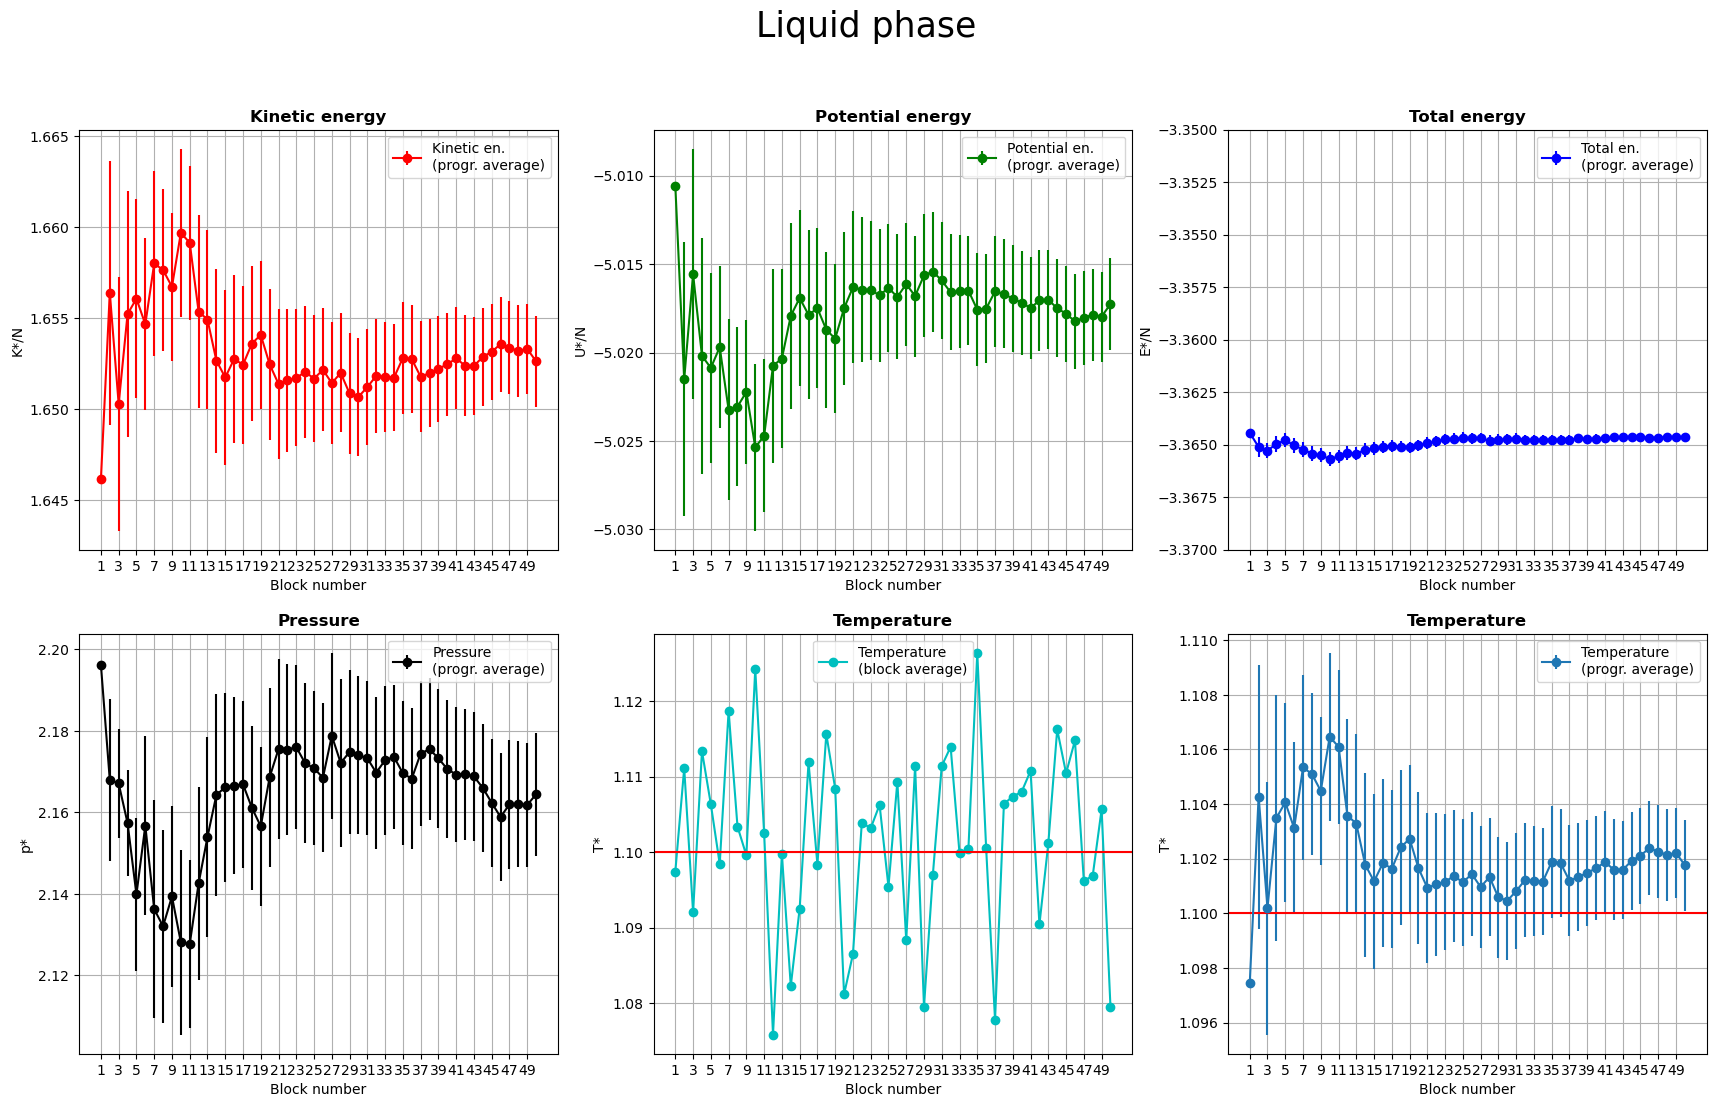

In [13]:
#liquid
N = 50
#x = np.arange(N)+1  
plt.figure(figsize=(21,12))
plt.suptitle("Liquid phase", fontsize = 25)

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    x, ave, ave_prog, err = np.loadtxt("../Data/04.1_liquid_" + th_var[i] + ".dat", usecols=(0,1,2,3), unpack='true')

    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i], color = colors[i])
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(1,N+1,2))
    if(i==2):
        plt.ylim(-3.37, -3.35) # si nota che nella scala delle variazioni di K e U, l'energia totale resta fissata: Compatibile con NVE!
    if(i==4):
        plt.axhline(y=1.1, color ="r") # desired equilibrium T*
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i])
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(1,N+1,2))
plt.axhline(y=1.1, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.show()

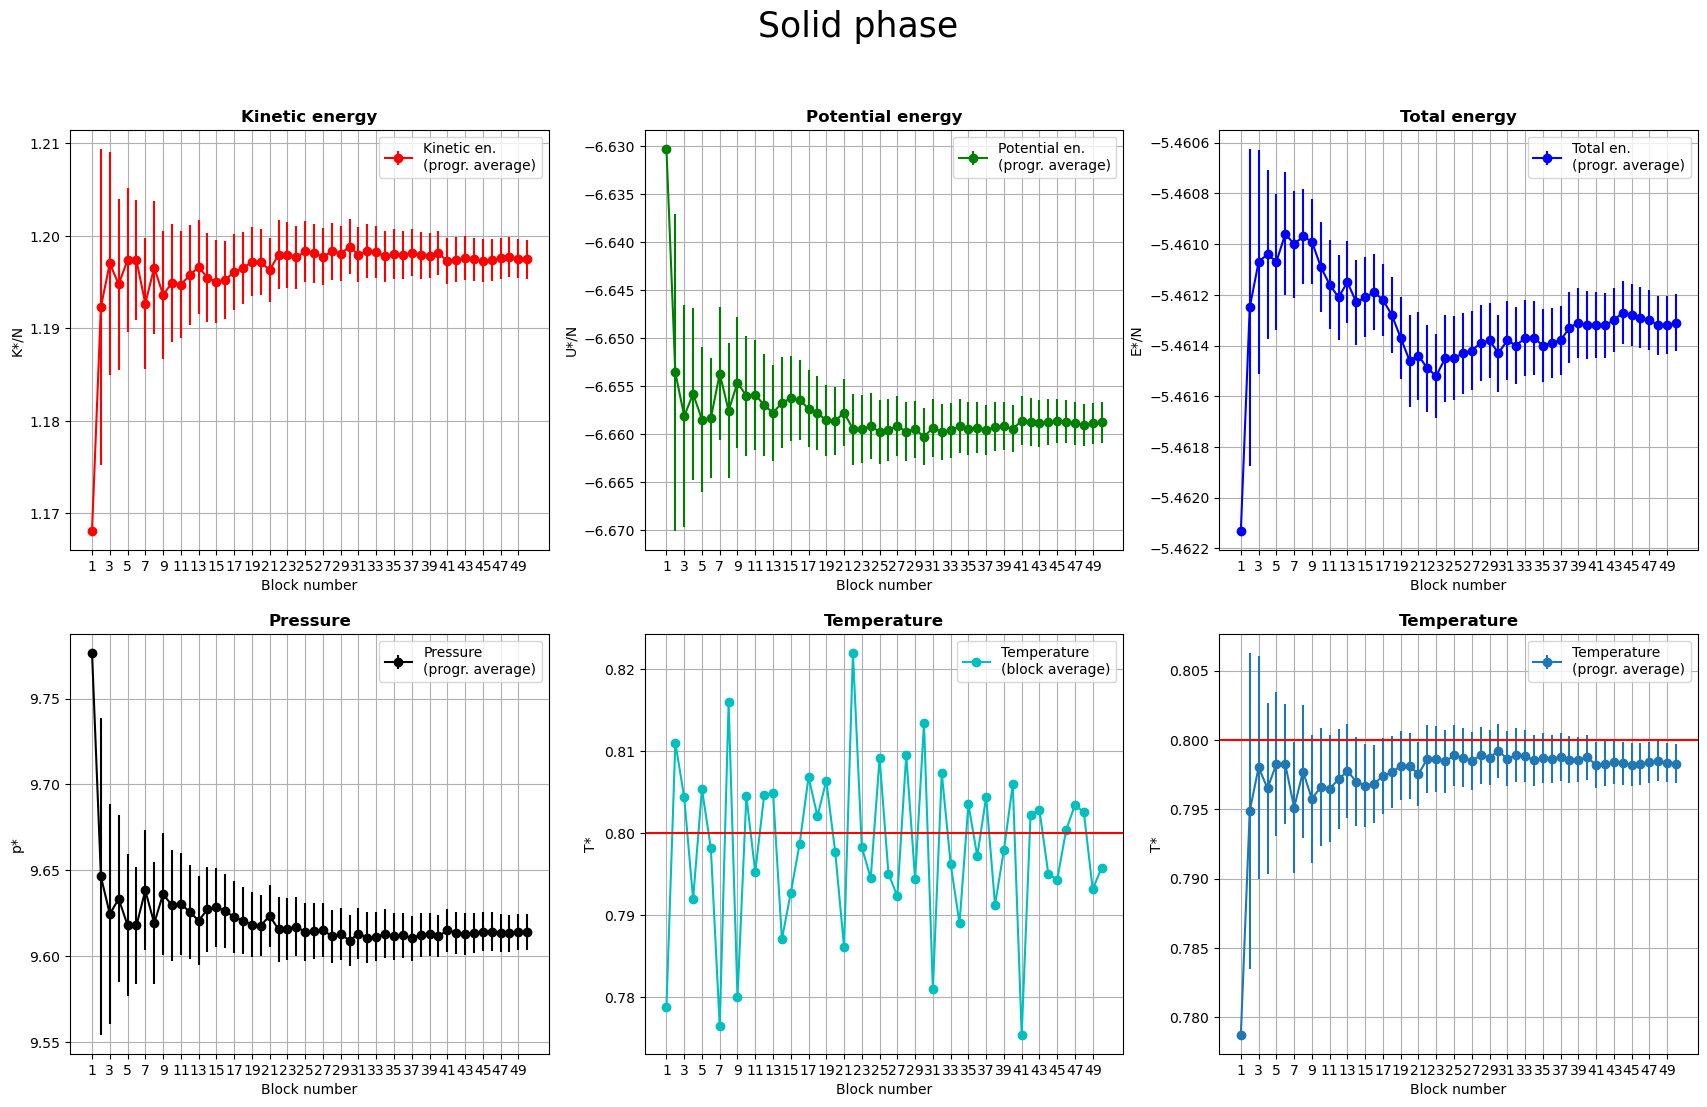

In [57]:
#solid
N = 50
#x = np.arange(N)+1  
plt.figure(figsize=(21,12))
plt.suptitle("Solid phase", fontsize = 25)

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    x, ave, ave_prog, err = np.loadtxt("../Data/04.1_eq_solid_" + th_var[i] + ".dat", usecols=(0,1,2,3), unpack='true')
    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i], color = colors[i])
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(1,N+1,2))
    if(i==4):
        plt.axhline(y = 0.8, color ="r") # desired equilibrium T*
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i])
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(1, N+1, 2))
plt.axhline(y=0.8, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.show()

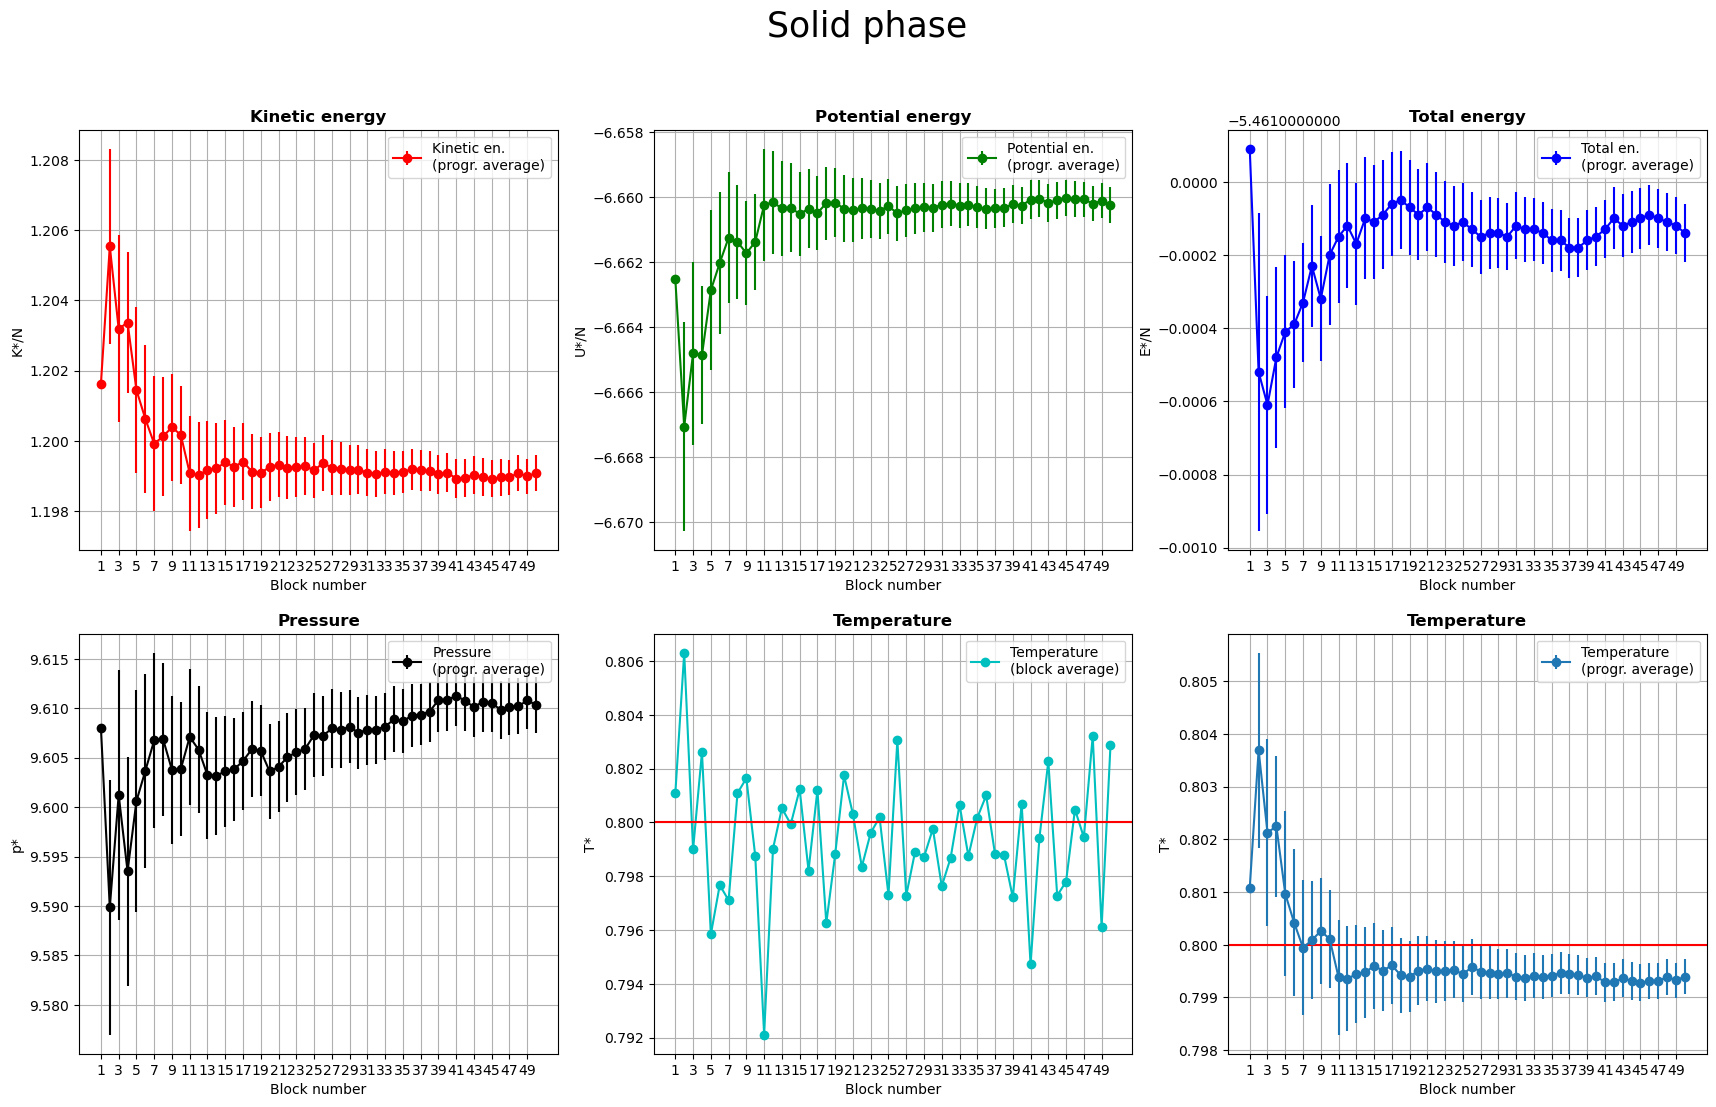

In [59]:
#solid
N = 50
#x = np.arange(N)+1  
plt.figure(figsize=(21,12))
plt.suptitle("Solid phase", fontsize = 25)

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    x, ave, ave_prog, err = np.loadtxt("../Data/04.1_solid_" + th_var[i] + ".dat", usecols=(0,1,2,3), unpack='true')

    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i], color = colors[i])
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(1,N+1,2))
    if(i==4):
        plt.axhline(y = 0.8, color ="r") # desired equilibrium T*
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i])
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(1, N+1, 2))
plt.axhline(y=0.8, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.show()

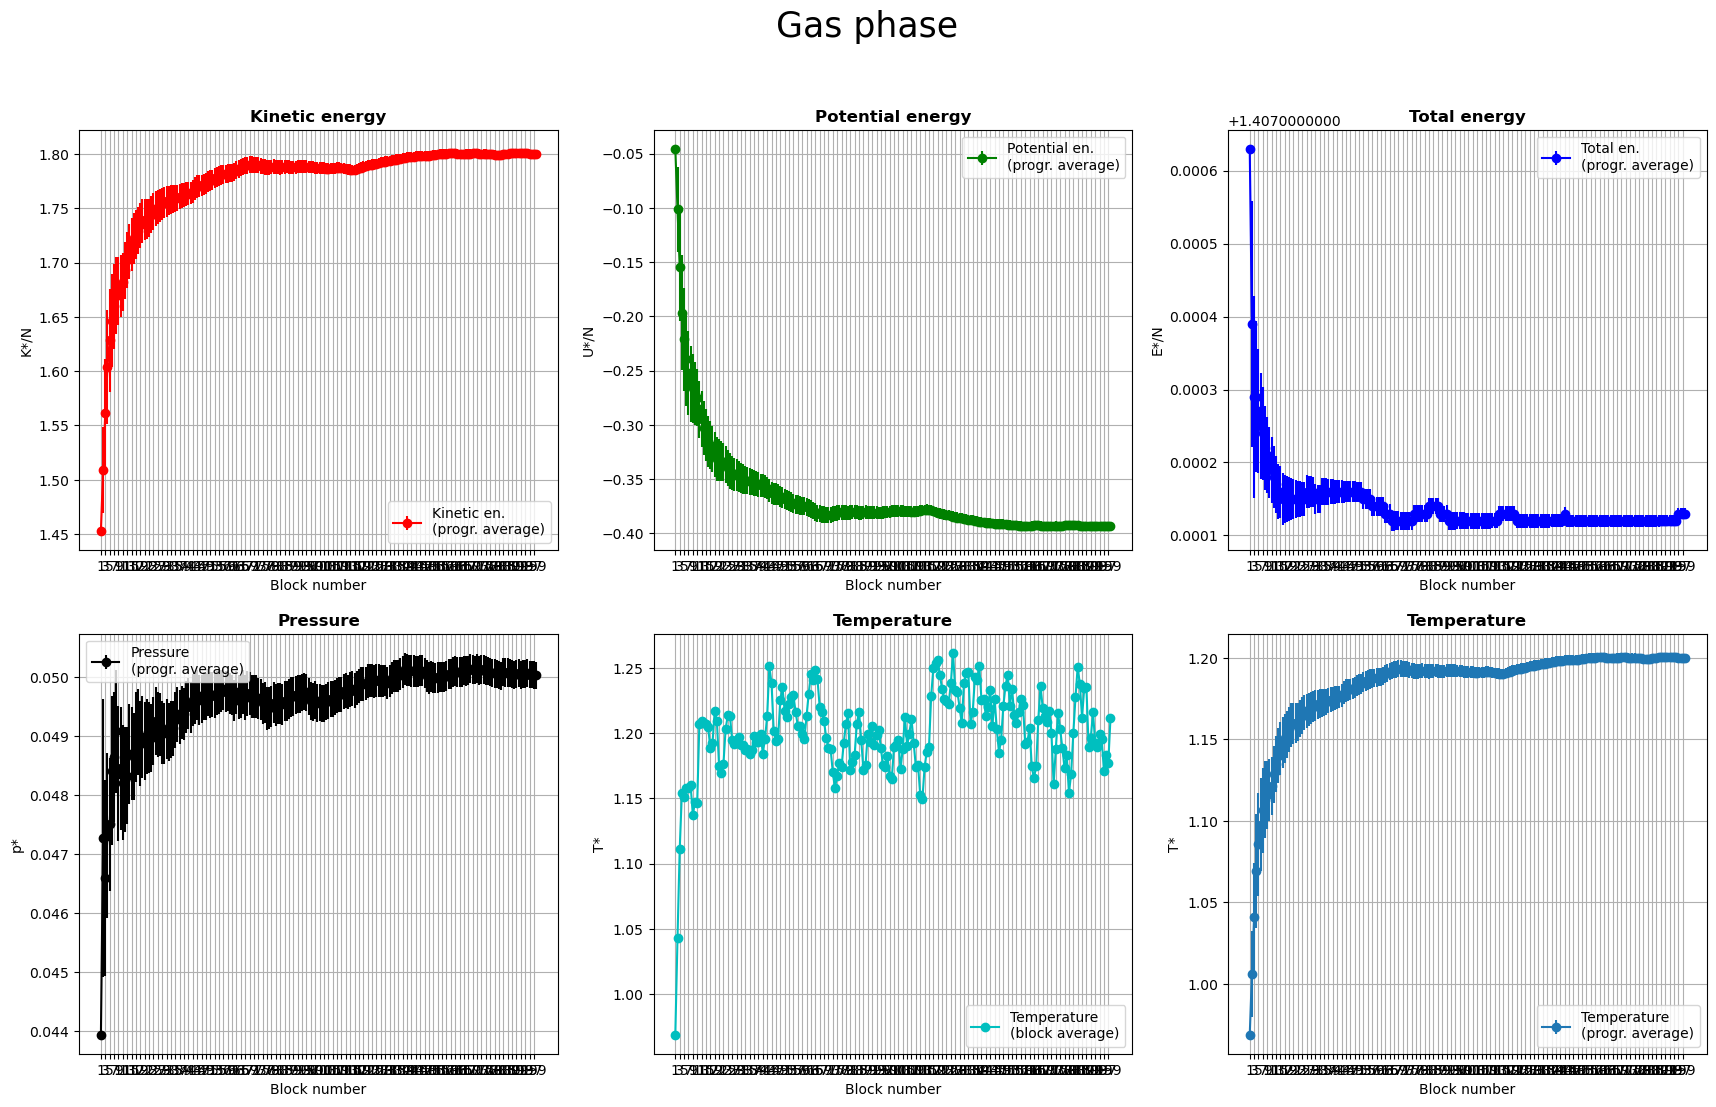

In [60]:
#gas
N = 200
#x = np.arange(N)+1  
plt.figure(figsize=(21,12))
plt.suptitle("Gas phase", fontsize = 25)

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    x, ave, ave_prog, err = np.loadtxt("../Data/04.1_eq_gas_" + th_var[i] + ".dat", usecols=(0,1,2,3), unpack='true')

    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i], color = colors[i])
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(1,N+1,2))
    #if(i==4):
        #plt.axhline(y = 0.8, color ="r") # desired equilibrium T*
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i])
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(1, N+1, 2))
#plt.axhline(y=0.8, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.show()

In [1]:
#gas
N = 50
#x = np.arange(N)+1  
plt.figure(figsize=(21,12))
plt.suptitle("Gas phase", fontsize = 25)

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    x, ave, ave_prog, err = np.loadtxt("../Data/04.1_gas_" + th_var[i] + ".dat", usecols=(0,1,2,3), unpack='true')
    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i], color = colors[i])
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(1,N+1,2))
    #if(i==4):
    #    plt.axhline(y = 0.8, color ="r") # desired equilibrium T*
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, marker='o', label=labels[i])
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(1, N+1, 2))
#plt.axhline(y=0.8, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.show()

NameError: name 'plt' is not defined